In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

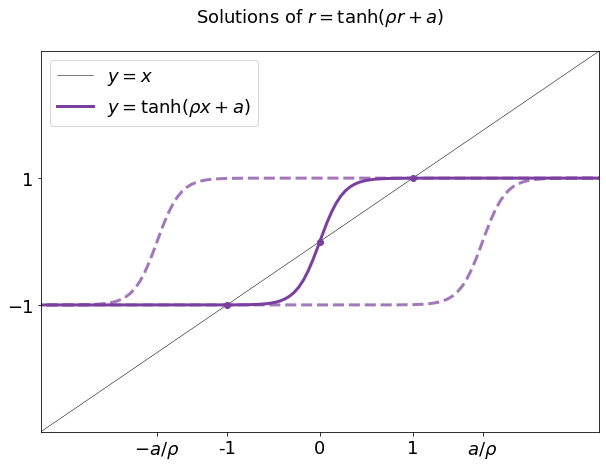

In [5]:
plt.rcParams["figure.figsize"] = [10, 7]
x = np.linspace(-5, 5, 200)
activ_f = np.tanh
f = lambda x, rho, a: activ_f(rho * x + a)
r = 4
color = np.array([0.48396212, 0.24616213, 0.6241649 ])
plt.plot(x, x, c='k', lw=.5, label="$y = x$")
plt.plot(x, f(x, r, 0), c=color, lw=3.0, label="$y = \\tanh (\\rho x + a)$")
plt.plot(x, f(x, r, -7), '--', c=color,lw=3.0, alpha=0.7)
plt.plot(x, f(x, r, 7), '--', c=color,lw=3.0, alpha=0.7)
plt.plot(1, 1, 'o', c=color)
plt.plot(-1, -1, 'o', c=color)
plt.plot(0, 0, 'o', c=color)


plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.xticks([0])
plt.yticks([-1, 1], fontsize=18)
plt.xticks([-7/4, -1, 0, 1, 7/4], ["$-a/\\rho$","-1", "0", "1", "$a/\\rho$"], fontsize=18)
plt.legend(fontsize=18)
plt.title("Solutions of $r = \\tanh(\\rho r + a)$\n", fontsize=18)
plt.show()

In [117]:
def f(y,t):
    specw = np.array([.1, 1, 2, 5])
    sinw = 1.0*np.array([1, 1.,1, 1])
    return -y + np.tanh(specw*y + sinw * np.sin(t))

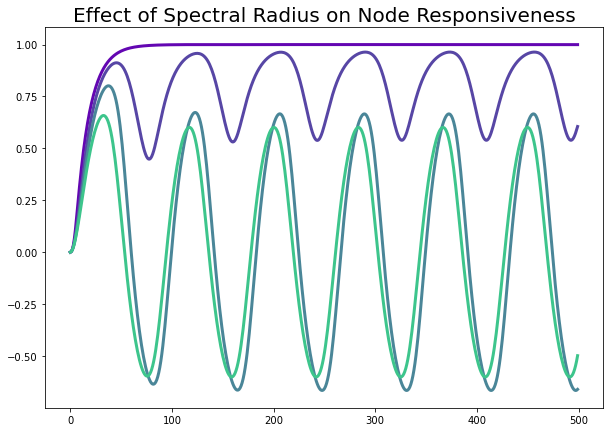

L2 Error: 0.095788312812583
Linf Error: 0.4813041692985329


In [206]:
def f(y,t):
    specw = np.array([.25, 1, 2, 5])
    sinw = 1.0*np.array([1, 1.,1, 1])
    return -y + np.tanh(specw*y + sinw * np.sin(t))
t =  np.linspace(0, 12*np.pi, 500)
orbit = odeint(f, [0, 0,0, 0], t)

color = np.array([0.2397127 , 0.77365814, 0.54752115])
spect = [.25, 1, 2, 5]

for i in range(3, -1, -1):
    col = color + i*np.array([.05, -.25, .05])
    plt.plot(orbit[:,i], lw=3, c=col)
    plt.plot(orbit[0, i], c=col, label=f"Sepcetral Radius = {spect[i]}")
#plt.legend()
plt.title("Effect of Spectral Radius on Node Responsiveness", fontsize=20)
plt.show()
U = np.sin(t)
Y = U @ orbit
W = Y @ np.linalg.inv(orbit.T @ orbit)
pre = orbit @ W

print(f"L2 Error: {np.mean(np.abs(pre - U))}")
print(f"Linf Error: {np.max(np.abs(pre - U))}")


## Increase input

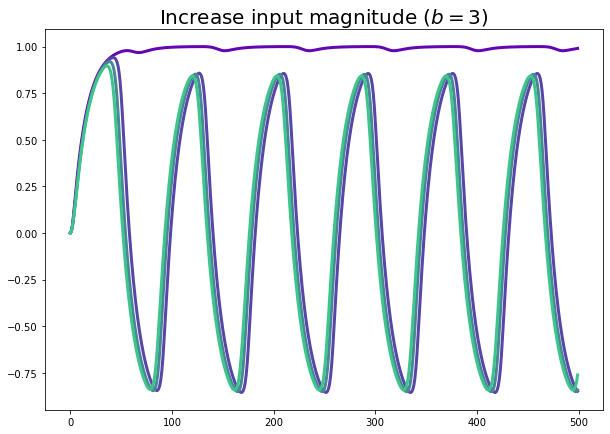

Error: 0.18666235973614692
Linf Error: 0.5076170250723074


In [207]:
def f(y,t):
    specw = np.array([.25, 1, 2, 5])
    sinw = 3*np.array([1, 1.,1, 1])
    return -y + np.tanh(specw*y + sinw * np.sin(t))

orbit = odeint(f, [0, 0,0, 0], np.linspace(0, 12*np.pi, 500))

color = np.array([0.2397127 , 0.77365814, 0.54752115])
spect = [.25, 1, 2, 5]

for i in range(3, -1, -1):
    col = color + i*np.array([.05, -.25, .05])
    plt.plot(orbit[:,i], lw=3, c=col)
    plt.plot(orbit[0, i], c=col, label=f"Sepcetral Radius = {spect[i]}")
#plt.legend()
plt.title("Increase input magnitude ($b = 3$)", fontsize=20)
plt.show()

U = np.sin(t)
Y = U @ orbit
W = Y @ np.linalg.inv(orbit.T @ orbit)
pre = orbit @ W

print(f"Error: {np.mean(np.abs(pre - U))}")
print(f"Linf Error: {np.max(np.abs(pre - U))}")


## Decrease Input

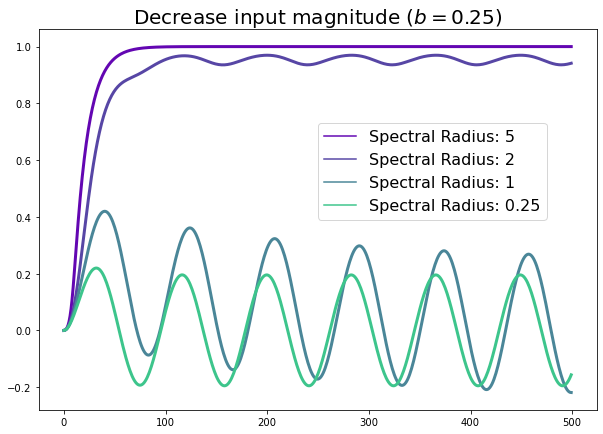

Error: 0.16991433455577418
Linf Error: 0.4746452285713465


In [208]:
def f(y,t):
    specw = np.array([.25, 1, 2, 5])
    sinw = .25*np.array([1, 1.,1, 1])
    return -y + np.tanh(specw*y + sinw * np.sin(t))

orbit = odeint(f, [0, 0,0, 0], np.linspace(0, 12*np.pi, 500))

color = np.array([0.2397127 , 0.77365814, 0.54752115])
spect = [.25, 1, 2, 5]

for i in range(3, -1, -1):
    col = color + i*np.array([.05, -.25, .05])
    plt.plot(orbit[:,i], lw=3, c=col)
    plt.plot(orbit[0, i], c=col, label=f"Spectral Radius: {spect[i]}")
plt.legend(loc=(.5,.5), fontsize=16)
plt.title("Decrease input magnitude ($b=0.25$)", fontsize=20)
plt.show()

U = np.sin(t)
Y = U @ orbit
W = Y @ np.linalg.inv(orbit.T @ orbit)
pre = orbit @ W

print(f"Error: {np.mean(np.abs(pre - U))}")
print(f"Linf Error: {np.max(np.abs(pre - U))}")


In [152]:
from scipy.optimize import fsolve

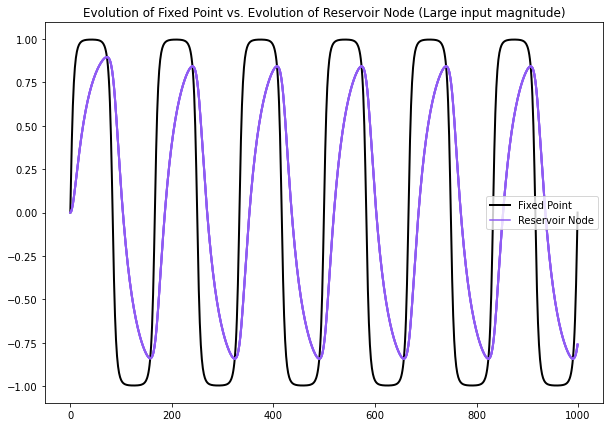

In [205]:
def g(y, t):
    rho = .25
    b = 3
    return -y + np.tanh(rho*y + b*np.sin(t))

t = np.linspace(0, 12*np.pi, 1000)
x0 = .5
fp = [fsolve(lambda x: g(x, t0), x0) for t0 in t]
plt.plot(fp, c="k", lw=2, label="Fixed Point")

orbit = odeint(g, [0, 0,0, 0], np.linspace(0, 12*np.pi, 1000))
col = np.random.rand(3)
plt.plot(orbit, lw=2, c=col)
plt.plot(0, orbit[0,0], c=col, label="Reservoir Node")
plt.title("Evolution of Fixed Point vs. Evolution of Reservoir Node (Large input magnitude)")
plt.legend()
plt.show()

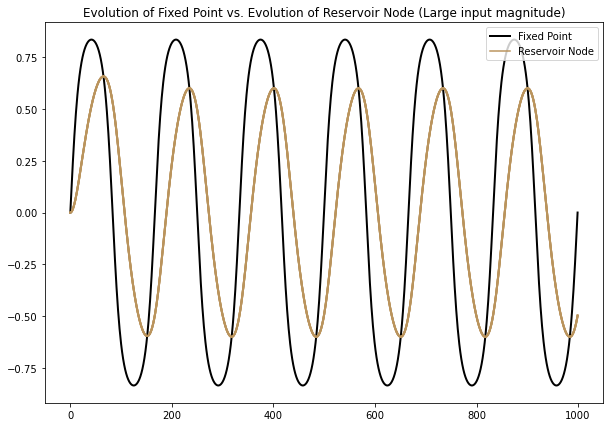

In [204]:
def g(y, t):
    rho = .25
    b = 1
    return -y + np.tanh(rho*y + b*np.sin(t))

t = np.linspace(0, 12*np.pi, 1000)
x0 = .5
fp = [fsolve(lambda x: g(x, t0), x0) for t0 in t]
plt.plot(fp, c="k", lw=2, label="Fixed Point")

orbit = odeint(g, [0, 0,0, 0], np.linspace(0, 12*np.pi, 1000))
col = np.random.rand(3)
plt.plot(orbit, lw=2, c=col)
plt.plot(0, orbit[0,0], c=col, label="Reservoir Node")
plt.title("Evolution of Fixed Point vs. Evolution of Reservoir Node (Small input magnitude)")
plt.legend()
plt.show()